In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [12]:
files = glob.glob('../TSP/GA/*.csv')
files.sort()
#Number of Trials
trials = 5
#File name beginining
nb = 14
#File name ending
ne = -10
#Output file
name = '../TSP/tsp.csv'
#Range
r = [5,10,50,100,150,200,250,300]

In [13]:
files

['../TSP/GA/TSP_GA100_10_10_1_LOG.csv',
 '../TSP/GA/TSP_GA100_10_10_2_LOG.csv',
 '../TSP/GA/TSP_GA100_10_10_3_LOG.csv',
 '../TSP/GA/TSP_GA100_10_10_4_LOG.csv',
 '../TSP/GA/TSP_GA100_10_10_5_LOG.csv',
 '../TSP/GA/TSP_GA100_10_30_1_LOG.csv',
 '../TSP/GA/TSP_GA100_10_30_2_LOG.csv',
 '../TSP/GA/TSP_GA100_10_30_3_LOG.csv',
 '../TSP/GA/TSP_GA100_10_30_4_LOG.csv',
 '../TSP/GA/TSP_GA100_10_30_5_LOG.csv',
 '../TSP/GA/TSP_GA100_10_50_1_LOG.csv',
 '../TSP/GA/TSP_GA100_10_50_2_LOG.csv',
 '../TSP/GA/TSP_GA100_10_50_3_LOG.csv',
 '../TSP/GA/TSP_GA100_10_50_4_LOG.csv',
 '../TSP/GA/TSP_GA100_10_50_5_LOG.csv',
 '../TSP/GA/TSP_GA100_30_10_1_LOG.csv',
 '../TSP/GA/TSP_GA100_30_10_2_LOG.csv',
 '../TSP/GA/TSP_GA100_30_10_3_LOG.csv',
 '../TSP/GA/TSP_GA100_30_10_4_LOG.csv',
 '../TSP/GA/TSP_GA100_30_10_5_LOG.csv',
 '../TSP/GA/TSP_GA100_30_30_1_LOG.csv',
 '../TSP/GA/TSP_GA100_30_30_2_LOG.csv',
 '../TSP/GA/TSP_GA100_30_30_3_LOG.csv',
 '../TSP/GA/TSP_GA100_30_30_4_LOG.csv',
 '../TSP/GA/TSP_GA100_30_30_5_LOG.csv',


In [14]:
dfs = []
for indx, f in enumerate(files):
    dfs.append(pd.read_csv(f))

In [15]:
df_concats = []
for x in range(0,len(dfs),trials):
    df_concat = pd.concat([dfs[x+i] for i in range(trials)])
    by_row_index = df_concat.groupby(df_concat.index)
    df_means = by_row_index.mean()
    df_concats.append(df_means.loc[r])

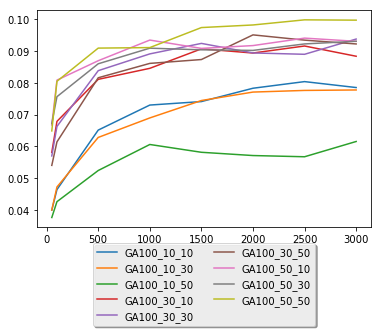

In [16]:
ax = plt.subplot(111)
for i,row in enumerate(df_concats):
    ax.plot(row[['iterations']],row[['fitness']], label = files[i*trials][nb:ne])
    
ax.legend()    
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.show()

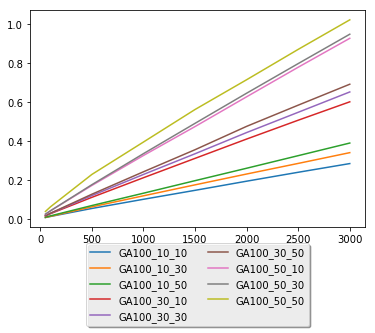

In [17]:
ax = plt.subplot(111)
for i,row in enumerate(df_concats):
    ax.plot(row[['iterations']],row[['time']], label = files[i*trials][nb:ne])
    
ax.legend()    
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.show()

In [18]:
for i in range(len(df_concats)):
    print(i, files[i*trials][nb:ne])

0 GA100_10_10
1 GA100_10_30
2 GA100_10_50
3 GA100_30_10
4 GA100_30_30
5 GA100_30_50
6 GA100_50_10
7 GA100_50_30
8 GA100_50_50


In [19]:
#Change this
df = df_concats[8]
df

,iterations,fitness,time,fevals
5,50.0,0.064883,0.038909,4285.2
10,100.0,0.080486,0.063129,7768.2
50,500.0,0.090932,0.228757,35665.0
100,1000.0,0.091094,0.395050,70509.4
150,1500.0,0.097393,0.561952,105430.6
200,2000.0,0.098211,0.714674,140316.2
250,2500.0,0.099824,0.870505,175238.6
300,3000.0,0.099724,1.022024,210115.2


In [20]:
with open(name, 'a') as f:
    f.write('#Genetic Algorithm\n')
    
df.to_csv(name, sep=',', mode='a', header=True)